## Installation and Configuration of Kaggle Environment

### Setting up Kaggle Access

In [1]:
!pip install kaggle

In [2]:
from google.colab import files

In [3]:
! mkdir ~/.kaggle

### Uploading Kaggle API token file

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sonamehdizade","key":"9591d354464c0a4247a665fb7fabe316"}'}

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

### Downloading and unzipping the plant dataset from Kaggle

In [7]:
 ! kaggle datasets list -s plant

ref                                                      title                                            size  lastUpdated          downloadCount  
-------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  
vipoooool/new-plant-diseases-dataset                     New Plant Diseases Dataset                        3GB  2018-11-18 07:09:16          16744  
vbookshelf/v2-plant-seedlings-dataset                    V2 Plant Seedlings Dataset                        3GB  2018-12-13 14:20:52           8194  
abdallahalidev/plantvillage-dataset                      PlantVillage Dataset                              4GB  2019-09-01 11:52:26           4970  
emmarex/plantdisease                                     PlantVillage Dataset                            658MB  2018-10-30 01:16:23          22739  
saroz014/plant-disease                                   Plant Disease                                    

In [8]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [01:09<00:00, 85.1MB/s]
100% 2.70G/2.70G [01:09<00:00, 41.8MB/s]


In [9]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  sample_data


In [10]:
import numpy as np
import pandas as pd 
import os

In [11]:
!unzip ./new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [12]:
!ls 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)'

train  valid


In [13]:
%config Completer.use_jedi = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [14]:
!nvidia-smi

Wed Nov 17 05:49:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
import torch
torch.__version__

'1.10.0+cu111'

In [16]:
!pip install --upgrade fastai

     |████████████████████████████████| 189 kB 4.0 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [17]:
import fastai
fastai.__version__

'2.5.3'

In [18]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

## Define the data input path

In [19]:
data_path = './new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)'

## Create Transformations:
* RandomSizedCrop
* Normalization

In [20]:
tfms_for_item = RandomResizedCrop(128, min_scale=0.35)
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]

## Load data into a DataLoader object and apply transformations

In [21]:
data = ImageDataLoaders.from_folder(data_path, item_tfms=tfms_for_item,
                                    batch_tfms=tfms_for_batch, 
                                    valid_pct=0.15, shuffle=True)

## Show a sample set of images

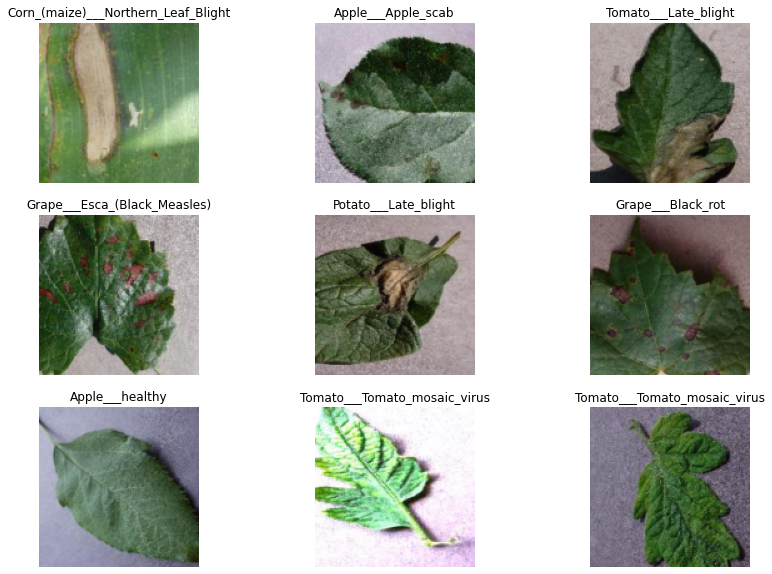

In [22]:
data.show_batch(figsize=(14,10))

## Printing the class labels

In [23]:
print("Number of classes: ", data.c)

Number of classes 38


In [24]:
[print("Label #{} -> {}\n".format(i,v)) for i,v in enumerate(data.train.vocab)]

Label #0 -> Apple___Apple_scab

Label #1 -> Apple___Black_rot

Label #2 -> Apple___Cedar_apple_rust

Label #3 -> Apple___healthy

Label #4 -> Blueberry___healthy

Label #5 -> Cherry_(including_sour)___Powdery_mildew

Label #6 -> Cherry_(including_sour)___healthy

Label #7 -> Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot

Label #8 -> Corn_(maize)___Common_rust_

Label #9 -> Corn_(maize)___Northern_Leaf_Blight

Label #10 -> Corn_(maize)___healthy

Label #11 -> Grape___Black_rot

Label #12 -> Grape___Esca_(Black_Measles)

Label #13 -> Grape___Leaf_blight_(Isariopsis_Leaf_Spot)

Label #14 -> Grape___healthy

Label #15 -> Orange___Haunglongbing_(Citrus_greening)

Label #16 -> Peach___Bacterial_spot

Label #17 -> Peach___healthy

Label #18 -> Pepper,_bell___Bacterial_spot

Label #19 -> Pepper,_bell___healthy

Label #20 -> Potato___Early_blight

Label #21 -> Potato___Late_blight

Label #22 -> Potato___healthy

Label #23 -> Raspberry___healthy

Label #24 -> Soybean___healthy

Label #25 ->

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Creating a model 

In [25]:
model = cnn_learner(data, resnet34, metrics=accuracy,  model_dir="/tmp/model2/")

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

## Finding the most optimal learning rate

SuggestedLRs(valley=0.0020892962347716093)

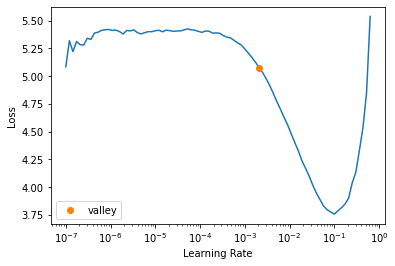

In [26]:
model.lr_find()

## Training a model

In [27]:
model.fit_one_cycle(2, 12e-3)

## Saving the model in a file

In [28]:
model.save('./my_model.pkl')

Path('/tmp/model2/my_model.pkl.pth')

In [29]:
model.export("model")

In [30]:
!ls /tmp/model2/

my_model.pkl.pth


In [31]:
!ls

 kaggle.json				  new-plant-diseases-dataset.zip
'new plant diseases dataset(augmented)'   sample_data
'New Plant Diseases Dataset(Augmented)'   test


## Loading model from file

In [32]:
filename='/tmp/model2/my_model.pkl.pth'
model2 = load_learner("/tmp/model2/my_model.pkl.pth", cpu=False)

In [33]:
m = model2['model']

## Showing a sample result

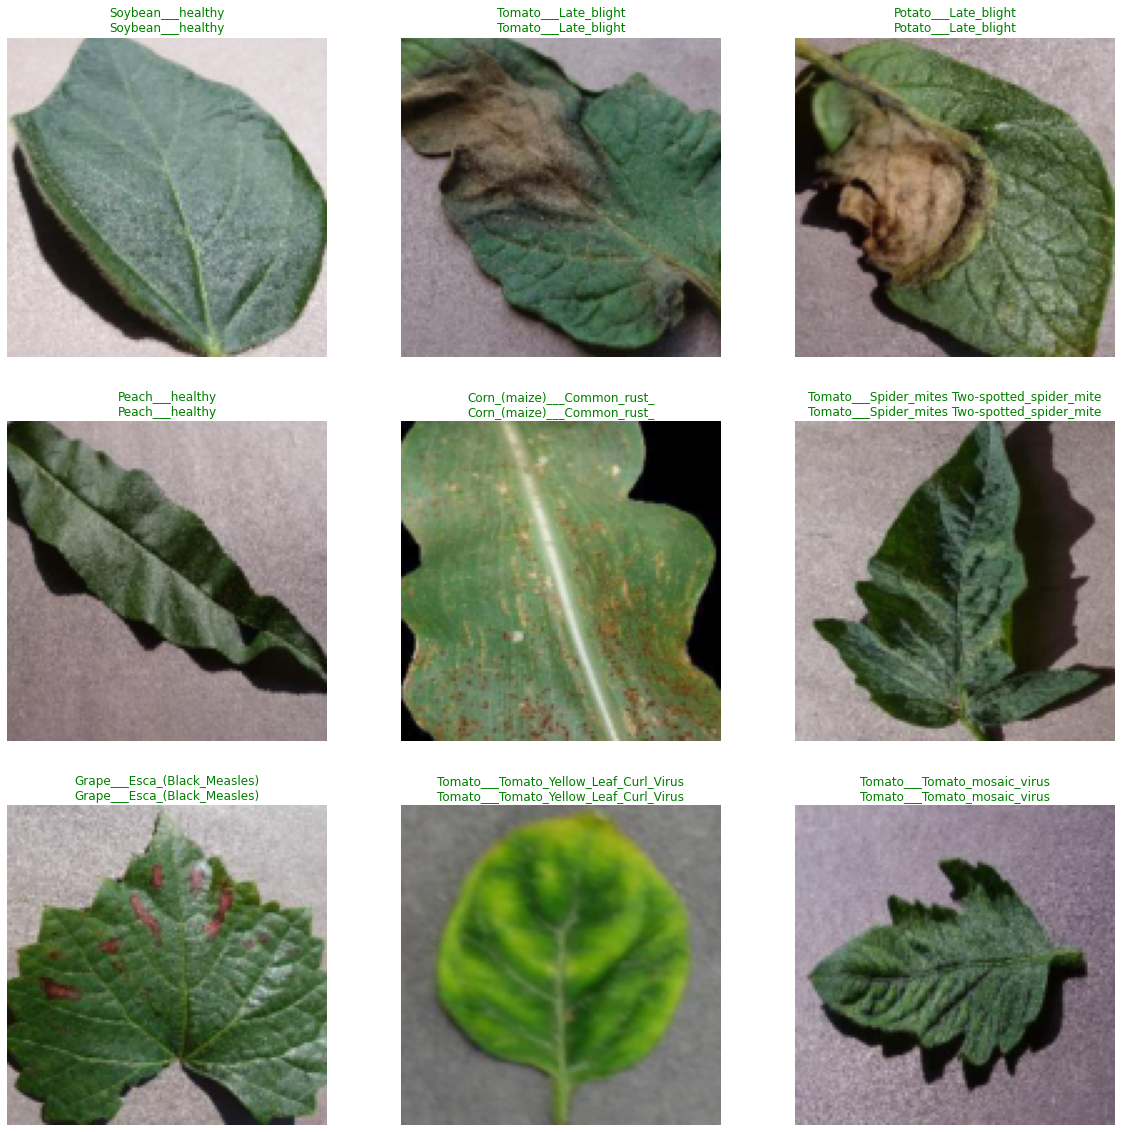

In [34]:
model.show_results(figsize=(20,20))

## Interpreting the model results

In [35]:
def plot_top_losses_debug(interp,idx, k=9, largest=True, **kwargs):
    if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
    if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
    else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
    k=9
    b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
    x,y,its = interp.dl._pre_show_batch(b, max_n=k)
    b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
    x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
    if its is not None:
        plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses, figsize=(20,20))

In [36]:
interpretation = ClassificationInterpretation.from_learner(model)
losses, idx = interpretation.top_losses()

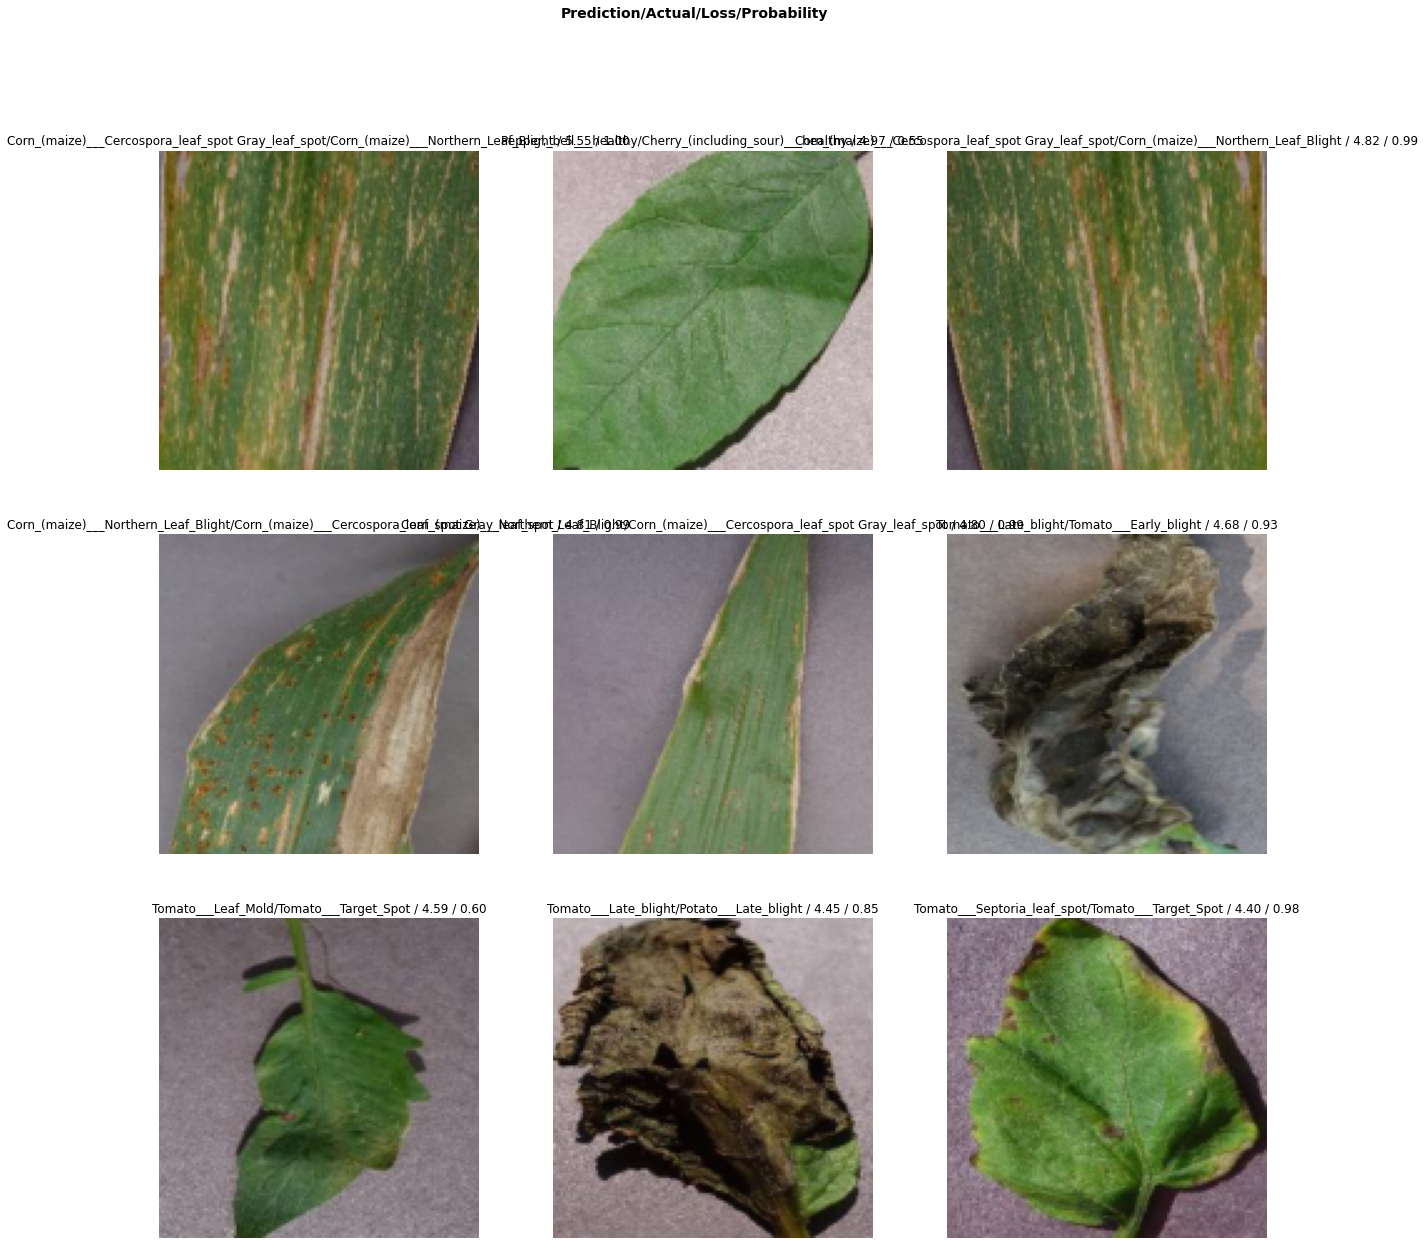

In [37]:
plot_top_losses_debug(interpretation,idx, k=9, largest=True,  figsize=(10,20))

## Plotting Confusion Matrix

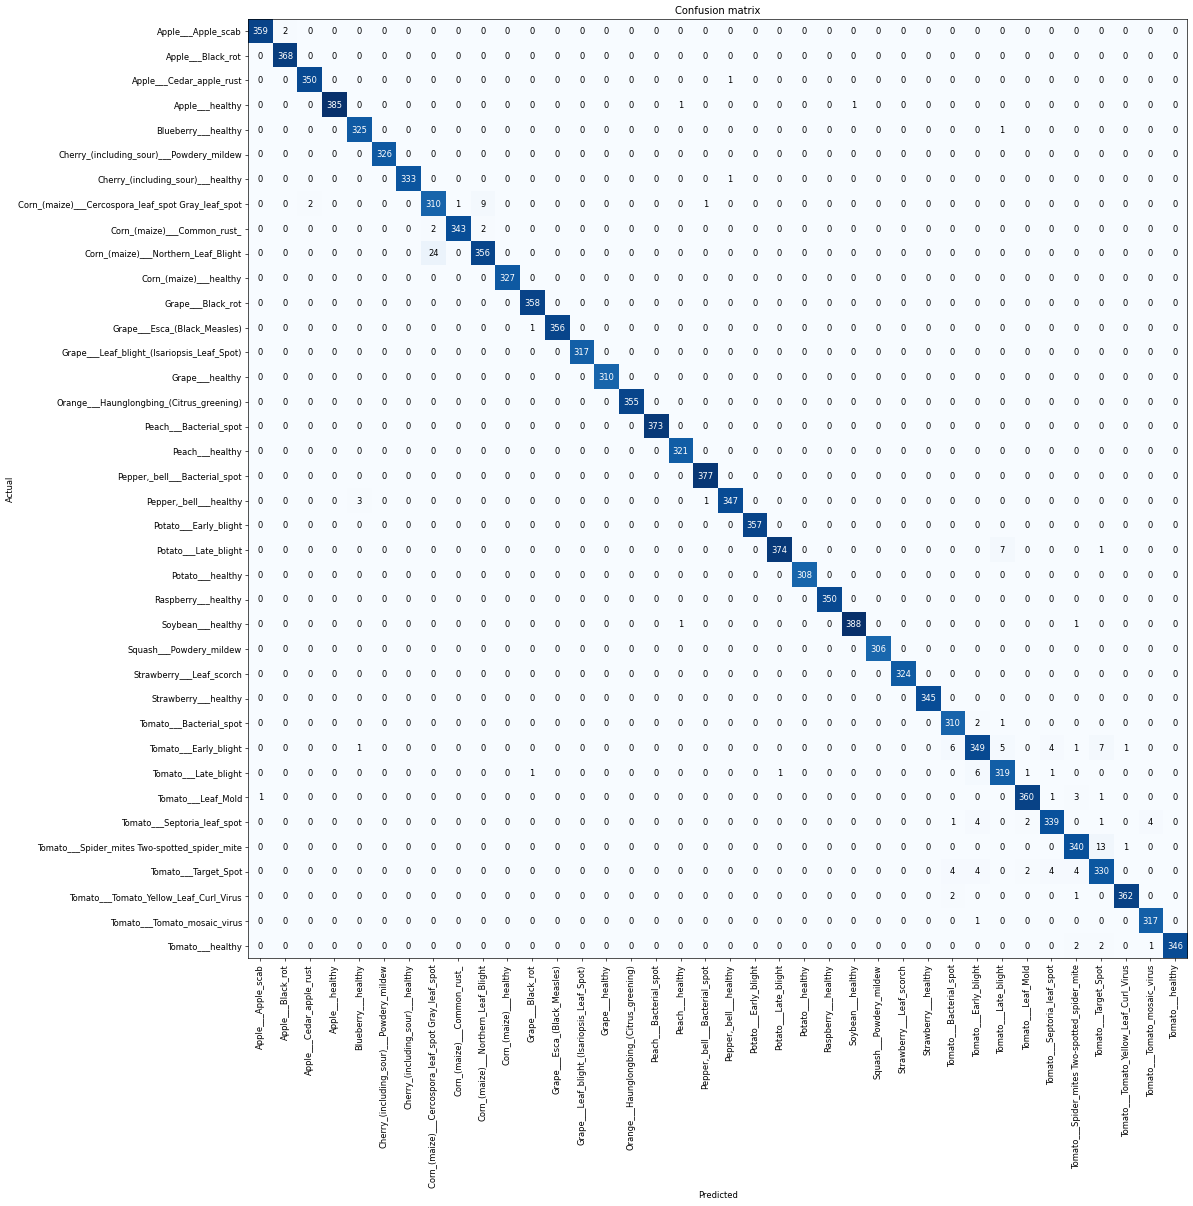

In [41]:
interpretation.plot_confusion_matrix(figsize=(20, 20), dpi=60)

## Plotting top losses

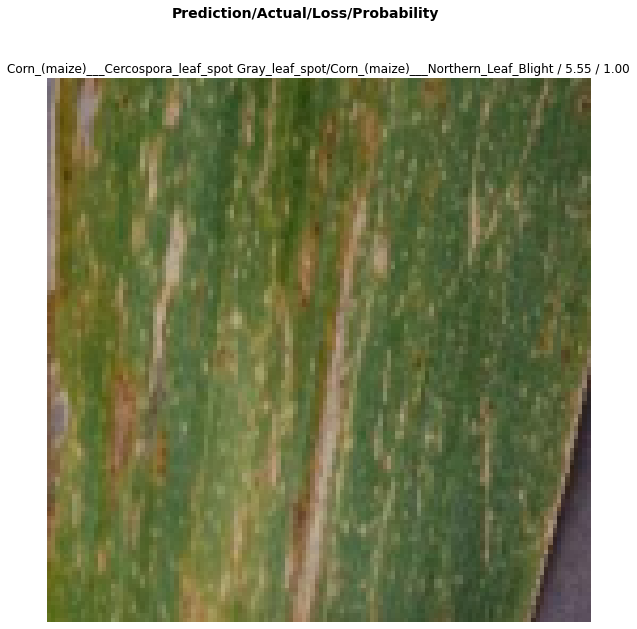

In [42]:
interpretation.plot_top_losses(1, figsize=(15,10))    #the false detection

In [40]:
interpretation.most_confused(min_val=2)

[('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  24),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 13),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  9),
 ('Potato___Late_blight', 'Tomato___Late_blight', 7),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 7),
 ('Tomato___Early_blight', 'Tomato___Bacterial_spot', 6),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 6),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 5),
 ('Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 4),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 4),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 4),
 ('Tomato___Target_Spot', 'Tomato___Bacterial_spot', 4),
 ('Tomato___Target_Spot', 'Tomato___Early_blight', 4),
 ('Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 4),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mi